## Análisis de lluvias monocromaticas de Foton

El set de simulaciones esta compuesto por 10000 lluvias verticales de Gamma de 10GeV, 1000GeV.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab
import os

In [108]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/csarmiento/Documentos/rpc_work/")
os.getcwd()

'/home/csarmiento/Documentos/rpc_work'

In [109]:
# 100 MeV
# 
df01= pd.read_csv(r"rbm_100MeV_G/100010.pri.bz2", compression='bz2', delimiter=" ")
df01.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,0.1,-16.0458,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.1,-17.4047,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.1,-35.0270,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.1,-16.8647,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.1,-33.7834,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# 1 GeV
# 
df1= pd.read_csv(r"rbm_1GeV_G/100100.pri.bz2", compression='bz2', delimiter=" ")
df1.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,1.0,-31.3100,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,-16.2728,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,-17.3221,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,-27.7269,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,-21.1588,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# 10 GeV
# 
df10= pd.read_csv(r"rbm_10GeV_G/101000.pri.bz2", compression='bz2', delimiter=" ")
df10.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,10.0,-26.8119,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,10.0,-31.9728,0.0,0.0,2.0,0.0,0.0,0.0,2.0
2,1,10.0,-33.7519,0.0,0.0,3.0,0.0,0.0,0.0,3.0
3,1,10.0,-23.2159,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,10.0,-25.4533,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# 100 GeV
# 
df100= pd.read_csv(r"rbm_100GeV_G/110000.pri.bz2", compression='bz2', delimiter=" ")
df100.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,100.0,-33.8459,0.0,0.0,55.0,8.0,0.0,0.0,63.0
1,1,100.0,-16.1426,0.0,0.0,367.0,43.0,0.0,0.0,410.0
2,1,100.0,-25.9485,0.0,0.0,125.0,10.0,0.0,0.0,135.0
3,1,100.0,-12.5613,0.0,0.0,596.0,62.0,0.0,0.0,658.0
4,1,100.0,-27.8725,0.0,0.0,68.0,5.0,0.0,0.0,73.0


In [113]:
# 1000 GeV
# 
df1000= pd.read_csv(r"rbm_1000GeV_G/199900.pri.bz2", compression='bz2', delimiter=" ")
df1000.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,1000.0,-25.8366,0.0,0.0,4183.0,424.0,1.0,1.0,4609.0
1,1,1000.0,-51.8986,0.0,0.0,2926.0,280.0,0.0,2.0,3208.0
2,1,1000.0,-23.3975,0.0,0.0,3826.0,430.0,0.0,3.0,4259.0
3,1,1000.0,-19.3934,0.0,0.0,4137.0,416.0,0.0,0.0,4553.0
4,1,1000.0,-26.1982,0.0,0.0,2880.0,286.0,0.0,0.0,3166.0


#### Punto de primera interacción

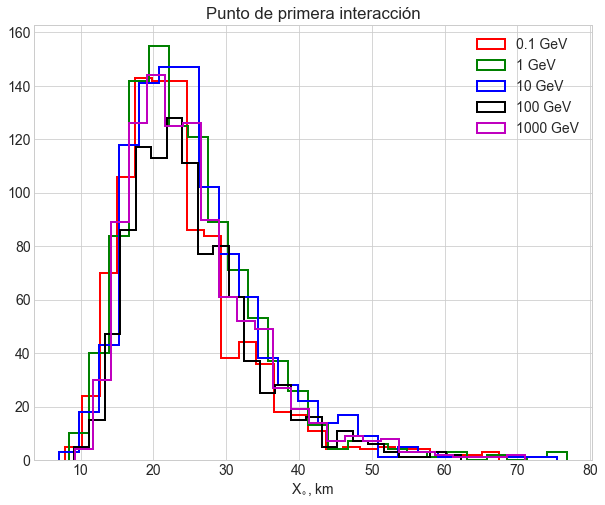

In [114]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df01["prm_x0"], bins=25, histtype='step', color="r", linewidth=2, fill=False, label="0.1 GeV");
plt.hist(-df1["prm_x0"], bins=25, histtype='step', color="g", linewidth=2, fill=False, label="1 GeV");
plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
plt.hist(-df100["prm_x0"], bins=25, histtype='step', color="k", linewidth=2, fill=False, label="100 GeV");
plt.hist(-df1000["prm_x0"], bins=25, histtype='step', color="m", linewidth=2, fill=False, label="1000 GeV");
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.legend()
plt.show()

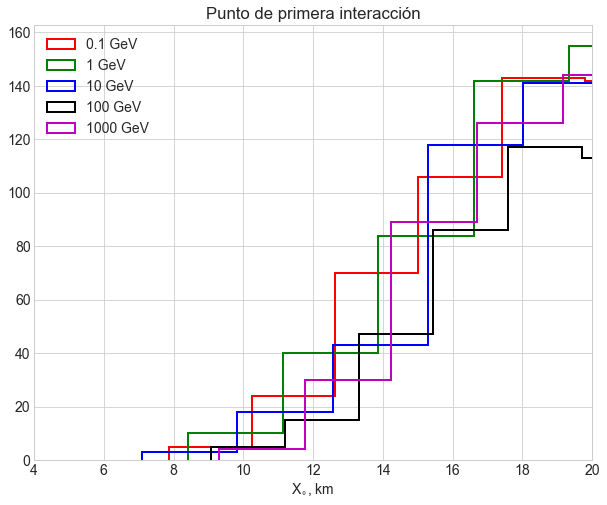

In [115]:
from matplotlib import pyplot

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df01["prm_x0"], bins=25, histtype='step', color="r", linewidth=2, fill=False, label="0.1 GeV");
plt.hist(-df1["prm_x0"], bins=25, histtype='step', color="g", linewidth=2, fill=False, label="1 GeV");
plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
plt.hist(-df100["prm_x0"], bins=25, histtype='step', color="k", linewidth=2, fill=False, label="100 GeV");
plt.hist(-df1000["prm_x0"], bins=25, histtype='step', color="m", linewidth=2, fill=False, label="1000 GeV");
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.xlim(4, 20)
#plt.ylim(None, 10000)
#pyplot.yscale('log')
plt.legend()
plt.show()

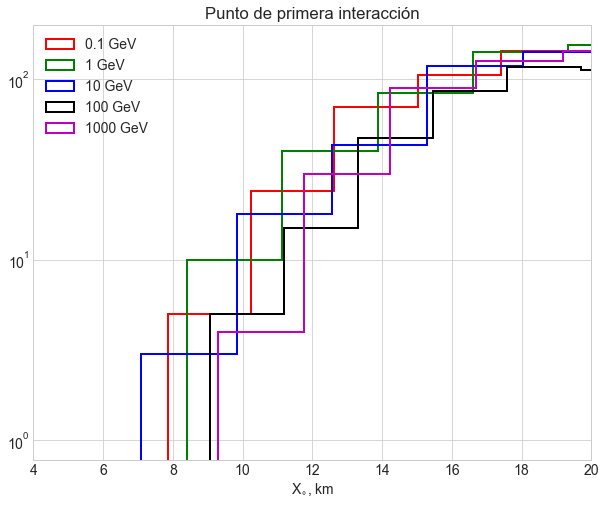

In [116]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df01["prm_x0"], bins=25, histtype='step', color="r", linewidth=2, fill=False, label="0.1 GeV");
plt.hist(-df1["prm_x0"], bins=25, histtype='step', color="g", linewidth=2, fill=False, label="1 GeV");
plt.hist(-df10["prm_x0"], bins=25, histtype='step', color="b", linewidth=2, fill=False, label="10 GeV");
plt.hist(-df100["prm_x0"], bins=25, histtype='step', color="k", linewidth=2, fill=False, label="100 GeV");
plt.hist(-df1000["prm_x0"], bins=25, histtype='step', color="m", linewidth=2, fill=False, label="1000 GeV");
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.xlim(4, 20)
#plt.ylim(None, 10000)
pyplot.yscale('log')
plt.legend()
plt.show()

### 10.000 lluvias solo para 100 MeV y 1GeV

In [117]:
# 100 MeV
# 
df_01= pd.read_csv(r"rbm_100MeV_G_/100010.pri.bz2", compression='bz2', delimiter=" ")
df_01.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,0.1,-29.1448,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.1,-15.1135,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,0.1,-15.1537,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.1,-18.8045,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.1,-22.5146,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# 1 GeV
# 
df_1= pd.read_csv(r"rbm_1GeV_G_/100100.pri.bz2", compression='bz2', delimiter=" ")
df_1.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
0,1,1.0,-17.1114,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,-14.6474,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.0,-30.3689,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.0,-28.9126,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.0,-21.4230,0.0,0.0,0.0,0.0,0.0,0.0,0.0


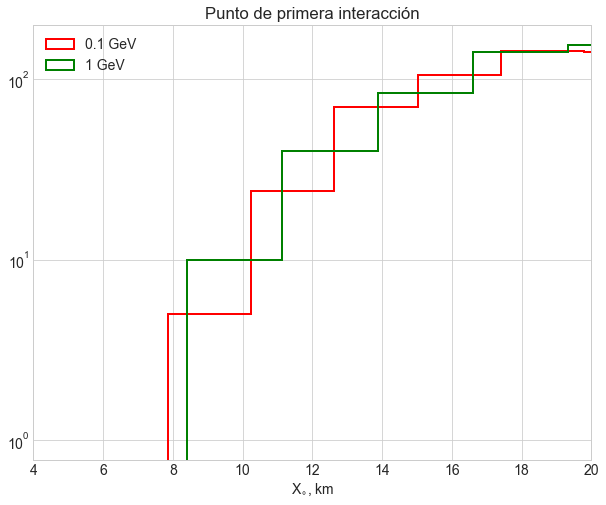

In [119]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,8))
plt.hist(-df01["prm_x0"], bins=25, histtype='step', color="r", linewidth=2, fill=False, label="0.1 GeV");
plt.hist(-df1["prm_x0"], bins=25, histtype='step', color="g", linewidth=2, fill=False, label="1 GeV");
plt.title("Punto de primera interacción")
plt.xlabel(r"X$_{\circ}$, km")
plt.xlim(4, 20)
#plt.ylim(None, 10000)
pyplot.yscale('log')
plt.legend()
plt.show()

###  Fotones que llegan sin interactuar -> 100 MeV

In [120]:
df01_ = df_01[-df_01["prm_x0"]<9]
df01_.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
177,1,0.1,-7.67444,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,1,0.1,-8.40604,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1053,1,0.1,-8.55478,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1222,1,0.1,-8.11769,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1414,1,0.1,-8.70150,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
df01_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 177 to 9807
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   34 non-null     int64  
 1   prm_energy   34 non-null     float64
 2   prm_x0       34 non-null     float64
 3   prm_theta    34 non-null     float64
 4   prm_phi      34 non-null     float64
 5   ph_obs_lev   34 non-null     float64
 6   el_obs_lev   34 non-null     float64
 7   hd_obs_lev   34 non-null     float64
 8   mu_obs_lev   34 non-null     float64
 9   tot_obs_lev  34 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 2.9 KB


In [122]:
ds01 = pd.read_csv(r"rbm_100MeV_G_/salida_100MeV_G_.shw.bz2", compression='bz2', delimiter=" ")

In [123]:
ds01.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,0001,-5.45313e-04,-4.67600e-04,+5.26538e-04,+4.37461e+02,+1.92599e+02,+5.09998e+03,00000001,1,0.1,0.0,0.0
1,0001,+5.91181e-03,+1.64520e-03,+1.99099e-02,+2.23083e+03,+6.54069e+02,+5.09958e+03,00000002,1,0.1,0.0,0.0
2,0001,-1.84040e-03,-7.37882e-05,+2.03887e-03,-5.28565e+02,+6.10642e+01,+5.09998e+03,00000003,1,0.1,0.0,0.0
3,0001,+2.82855e-03,-7.70323e-04,+8.18928e-03,+4.02583e+03,-1.34563e+03,+5.09859e+03,00000004,1,0.1,0.0,0.0
4,0001,-1.70113e-03,+7.78436e-04,+6.12433e-03,-8.32884e+02,+3.80436e+02,+5.09993e+03,00000005,1,0.1,0.0,0.0


In [124]:
ds01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   33 non-null     object 
 1   px          33 non-null     object 
 2   py          33 non-null     object 
 3   pz          33 non-null     object 
 4   x           33 non-null     object 
 5   y           33 non-null     object 
 6   z           33 non-null     object 
 7   shower_id   33 non-null     object 
 8   prm_id      33 non-null     int64  
 9   prm_energy  32 non-null     float64
 10  prm_theta   32 non-null     float64
 11  prm_phi     32 non-null     float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ KB


In [125]:
#Conversión de string a float de algunas variables
#
ds01['CorsikaId'] = pd.to_numeric(ds01['CorsikaId'],errors='coerce')
ds01['shower_id'] = pd.to_numeric(ds01['shower_id'],errors='coerce')
ds01['x'] = pd.to_numeric(ds01['x'],errors='coerce')
ds01['y'] = pd.to_numeric(ds01['y'],errors='coerce')

ds01['px'] = pd.to_numeric(ds01['px'],errors='coerce')
ds01['py'] = pd.to_numeric(ds01['py'],errors='coerce')
ds01['pz'] = pd.to_numeric(ds01['pz'],errors='coerce')

ds01['x'] = ds01['x']/100
ds01['y'] = ds01['y']/100

In [126]:
ds01_ = ds01[ds01["shower_id"]==1415]
ds01_.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi


###  Fotones que llegan sin interactuar -> 1 GeV

In [127]:
df1_ = df_1[-df_1["prm_x0"]<9]
df1_.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
1196,1,1.0,-8.73760,0.0,0.0,2.0,0.0,0.0,0.0,2.0
5357,1,1.0,-8.32094,0.0,0.0,5.0,0.0,0.0,0.0,5.0
6504,1,1.0,-8.33688,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8239,1,1.0,-8.61379,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8523,1,1.0,-8.91148,0.0,0.0,3.0,0.0,0.0,0.0,3.0


In [128]:
df1_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1196 to 9099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   6 non-null      int64  
 1   prm_energy   6 non-null      float64
 2   prm_x0       6 non-null      float64
 3   prm_theta    6 non-null      float64
 4   prm_phi      6 non-null      float64
 5   ph_obs_lev   6 non-null      float64
 6   el_obs_lev   6 non-null      float64
 7   hd_obs_lev   6 non-null      float64
 8   mu_obs_lev   6 non-null      float64
 9   tot_obs_lev  6 non-null      float64
dtypes: float64(9), int64(1)
memory usage: 528.0 bytes


In [129]:
ds1 = pd.read_csv(r"rbm_1GeV_G_/salida_1GeV_G.shw.bz2", compression='bz2', delimiter=" ")

In [130]:
ds1.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,0001,+1.10186e-03,-3.72552e-03,+8.41858e-02,+6.47577e+01,-2.14947e+02,+5.10000e+03,00000001,1,1.0,0.0,0.0
1,0001,-1.46012e-03,+1.07000e-03,+4.88049e-03,-3.72102e+02,+2.12381e+02,+5.09999e+03,00000001,1,1.0,0.0,0.0
2,0001,+9.50994e-05,-1.07855e-03,+3.76338e-03,+9.38229e+01,-6.07585e+02,+5.09997e+03,00000001,1,1.0,0.0,0.0
3,0001,-1.11021e-04,-1.96049e-04,+2.06550e-04,+4.29394e+02,+1.40397e+03,+5.09983e+03,00000002,1,1.0,0.0,0.0
4,0001,-5.54528e-04,-4.45886e-04,+1.56657e-03,-3.64009e+02,-2.30692e+02,+5.09999e+03,00000003,1,1.0,0.0,0.0


In [131]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CorsikaId   1321 non-null   object 
 1   px          1321 non-null   object 
 2   py          1321 non-null   object 
 3   pz          1321 non-null   object 
 4   x           1321 non-null   object 
 5   y           1321 non-null   object 
 6   z           1321 non-null   object 
 7   shower_id   1321 non-null   object 
 8   prm_id      1321 non-null   int64  
 9   prm_energy  1320 non-null   float64
 10  prm_theta   1320 non-null   float64
 11  prm_phi     1320 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 124.0+ KB


In [132]:
#Conversión de string a float de algunas variables
#
ds1['CorsikaId'] = pd.to_numeric(ds1['CorsikaId'],errors='coerce')
ds1['shower_id'] = pd.to_numeric(ds1['shower_id'],errors='coerce')
ds1['x'] = pd.to_numeric(ds1['x'],errors='coerce')
ds1['y'] = pd.to_numeric(ds1['y'],errors='coerce')

ds1['px'] = pd.to_numeric(ds1['px'],errors='coerce')
ds1['py'] = pd.to_numeric(ds1['py'],errors='coerce')
ds1['pz'] = pd.to_numeric(ds1['pz'],errors='coerce')

ds1['x'] = ds1['x']/100
ds1['y'] = ds1['y']/100

In [133]:
ds1_ = ds1[ds1["shower_id"]==1197]
ds1_.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi


###  Fotones que llegan sin interactuar -> 10 GeV

In [237]:
df10_ = df10[-df10["prm_x0"]<12]
df10_.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
122,1,10.0,-11.46770,0.0,0.0,68.0,6.0,0.0,0.0,74.0
123,1,10.0,-11.42610,0.0,0.0,19.0,2.0,0.0,0.0,21.0
166,1,10.0,-10.24970,0.0,0.0,69.0,2.0,0.0,0.0,71.0
244,1,10.0,-10.12270,0.0,0.0,36.0,5.0,0.0,0.0,41.0
448,1,10.0,-9.99465,0.0,0.0,64.0,7.0,0.0,0.0,71.0


In [238]:
df10_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 122 to 900
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   16 non-null     int64  
 1   prm_energy   16 non-null     float64
 2   prm_x0       16 non-null     float64
 3   prm_theta    16 non-null     float64
 4   prm_phi      16 non-null     float64
 5   ph_obs_lev   16 non-null     float64
 6   el_obs_lev   16 non-null     float64
 7   hd_obs_lev   16 non-null     float64
 8   mu_obs_lev   16 non-null     float64
 9   tot_obs_lev  16 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 1.4 KB


In [223]:
ds10 = pd.read_csv(r"rbm_10GeV_G/salida_10GeV_G.shw.bz2", compression='bz2', delimiter=" ")

In [224]:
ds10.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,0001,-1.30266e-03,+6.31059e-04,+1.86631e-02,-1.88476e+02,-4.19413e+01,+5.10000e+03,00000001,1,10.0,0.0,0.0
1,0001,+1.14449e-04,-8.14499e-04,+9.77939e-04,-3.85725e+02,-1.88505e+02,+5.09999e+03,00000002,1,10.0,0.0,0.0
2,0001,-2.86462e-04,-1.05685e-04,+2.08759e-04,-6.09717e+02,+2.34331e-01,+5.09997e+03,00000002,1,10.0,0.0,0.0
3,0001,+1.91796e-04,+7.34116e-04,+6.49400e-04,-1.50748e+02,-2.13310e+03,+5.09964e+03,00000003,1,10.0,0.0,0.0
4,0001,-3.82620e-04,-3.09926e-04,+1.53038e-03,-3.65248e+02,-2.65814e+03,+5.09944e+03,00000003,1,10.0,0.0,0.0


In [225]:
#Conversión de string a float de algunas variables
#
ds10['CorsikaId'] = pd.to_numeric(ds10['CorsikaId'],errors='coerce')
ds10['shower_id'] = pd.to_numeric(ds10['shower_id'],errors='coerce')
ds10['x'] = pd.to_numeric(ds10['x'],errors='coerce')
ds10['y'] = pd.to_numeric(ds10['y'],errors='coerce')

ds10['px'] = pd.to_numeric(ds10['px'],errors='coerce')
ds10['py'] = pd.to_numeric(ds10['py'],errors='coerce')
ds10['pz'] = pd.to_numeric(ds10['pz'],errors='coerce')

ds10['x'] = ds10['x']/100
ds10['y'] = ds10['y']/100

In [226]:
ds10_ = ds10[ds10["shower_id"]==620]
ds10_.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi
5469,1.0,0.000444,0.000843,0.008767,-1.100220,19.05170,+5.09971e+03,620.0,1,10.0,0.0,0.0
5470,1.0,0.000265,-0.000010,0.000600,-0.236057,-1.85844,+5.10000e+03,620.0,1,10.0,0.0,0.0


In [227]:
E10 = np.sqrt(ds10_["px"]**2 + ds10_["py"]**2 + ds10_["pz"]**2)

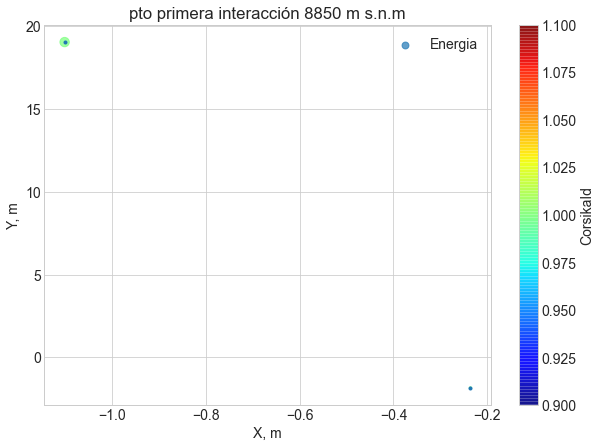

In [228]:
ds10_.plot(kind="scatter", x="x", y="y", alpha=0.7,
    s=E10*10000, label="Energia", figsize=(10,7),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.plot(ds10_["x"], ds10_["y"], '.')
plt.xlabel("X, m")
plt.ylabel("Y, m")
#plt.xlim(-0.5, 2)
#plt.ylim(-6, -4)
plt.title("pto primera interacción 8850 m s.n.m")
plt.legend()

In [229]:
ds10_ = ds10[ds10["shower_id"]==584]
ds10_.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi
5236,1.0,0.004110,0.003752,0.004741,24.76630,23.15350,+5.09910e+03,584.0,1,10.0,0.0,0.0
5237,1.0,-0.000831,-0.002717,0.008266,-3.40762,-13.15910,+5.09986e+03,584.0,1,10.0,0.0,0.0
5238,1.0,0.000451,0.000316,0.001388,-1.28348,-1.72552,+5.10000e+03,584.0,1,10.0,0.0,0.0
5239,1.0,-0.000234,0.001774,0.005051,-2.14344,16.33750,+5.09979e+03,584.0,1,10.0,0.0,0.0
5240,1.0,-0.000911,0.000376,0.013027,-3.38872,1.04079,+5.09999e+03,584.0,1,10.0,0.0,0.0


In [230]:
E10 = np.sqrt(ds10_["px"]**2 + ds10_["py"]**2 + ds10_["pz"]**2)

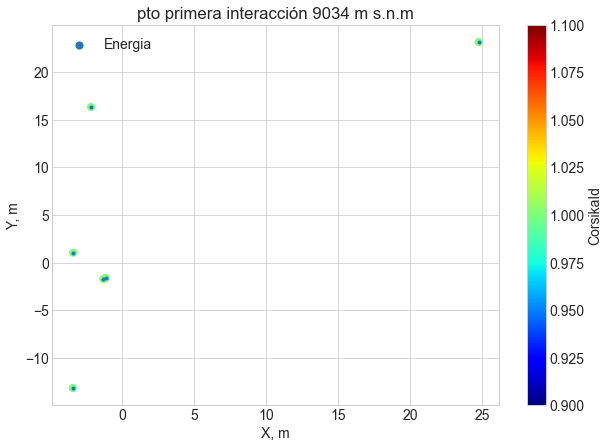

In [231]:
ds10_.plot(kind="scatter", x="x", y="y", alpha=1,
    s=ds10_["CorsikaId"]*50, label="Energia", figsize=(10,7),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.plot(ds10_["x"], ds10_["y"], '.')
plt.xlabel("X, m")
plt.ylabel("Y, m")
#plt.xlim(-0.5, 2)
#plt.ylim(-6, -4)
plt.title("pto primera interacción 9034 m s.n.m")
plt.legend()

In [232]:
ds10_ = ds10[ds10["shower_id"]==449]
ds10_.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi
3548,1.0,0.001493,-0.007074,0.059955,2.627060,-7.170700,+5.09995e+03,449.0,1,10.0,0.0,0.0
3549,1.0,-0.000333,0.001229,0.005374,-2.243680,9.992020,+5.09992e+03,449.0,1,10.0,0.0,0.0
3550,1.0,0.000825,-0.000652,0.001722,0.459926,-1.682390,+5.10000e+03,449.0,1,10.0,0.0,0.0
3551,1.0,0.000492,0.000824,0.010509,1.293580,1.881920,+5.10000e+03,449.0,1,10.0,0.0,0.0
3552,1.0,-0.000944,-0.001359,0.039685,-0.209317,-0.522584,+5.10000e+03,449.0,1,10.0,0.0,0.0


In [233]:
E10 = np.sqrt(ds10_["px"]**2 + ds10_["py"]**2 + ds10_["pz"]**2)

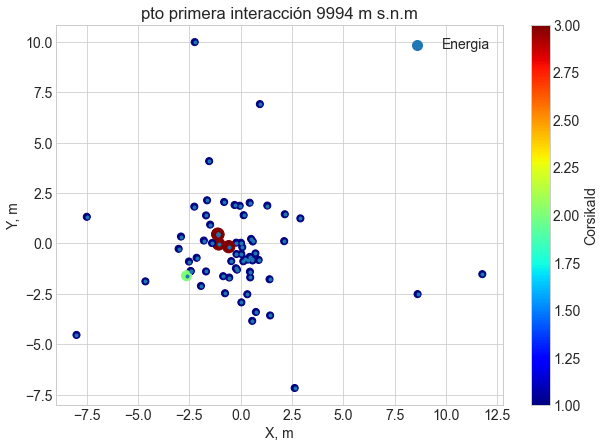

In [234]:
ds10_.plot(kind="scatter", x="x", y="y", alpha=1,
    s=ds10_["CorsikaId"]*50, label="Energia", figsize=(10,7),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.plot(ds10_["x"], ds10_["y"], '.')
plt.xlabel("X, m")
plt.ylabel("Y, m")
#plt.xlim(-0.5, 2)
#plt.ylim(-6, -4)
plt.title("pto primera interacción 9994 m s.n.m")
plt.legend()

In [183]:
ds10_ = ds10[ds10["shower_id"]==245]
ds10_.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi
2065,1.0,-0.000037,2.644610e-07,0.000333,0.512296,-1.612450,+5.10000e+03,245.0,1,10.0,0.0,0.0
2066,1.0,-0.002008,3.899010e-04,0.004384,-4.246520,3.446440,+5.09998e+03,245.0,1,10.0,0.0,0.0
2067,1.0,0.000953,-1.529140e-05,0.007046,0.144855,2.831110,+5.09999e+03,245.0,1,10.0,0.0,0.0
2068,1.0,-0.001989,9.365040e-04,0.029372,-1.550770,2.919470,+5.09999e+03,245.0,1,10.0,0.0,0.0
2069,1.0,-0.000060,-1.690000e-04,0.000057,-0.477547,-0.791064,+5.10000e+03,245.0,1,10.0,0.0,0.0


In [184]:
E10 = np.sqrt(ds10_["px"]**2 + ds10_["py"]**2 + ds10_["pz"]**2)

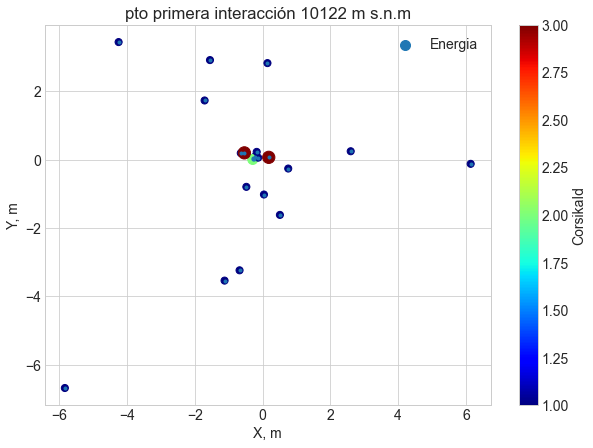

In [185]:
ds10_.plot(kind="scatter", x="x", y="y", alpha=1,
    s=ds10_["CorsikaId"]*50, label="Energia", figsize=(10,7),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.plot(ds10_["x"], ds10_["y"], '.')
plt.xlabel("X, m")
plt.ylabel("Y, m")
#plt.xlim(-0.5, 2)
#plt.ylim(-6, -4)
plt.title("pto primera interacción 10122 m s.n.m")
plt.legend()

###  Protones que llegan sin interactuar -> 100 GeV

In [239]:
df100_ = df100[-df100["prm_x0"]<15]
df100_.head()

,prm_Crk_id,prm_energy,prm_x0,prm_theta,prm_phi,ph_obs_lev,el_obs_lev,hd_obs_lev,mu_obs_lev,tot_obs_lev
3,1,100.0,-12.5613,0.0,0.0,596.0,62.0,0.0,0.0,658.0
5,1,100.0,-14.5785,0.0,0.0,458.0,39.0,0.0,0.0,497.0
6,1,100.0,-13.1166,0.0,0.0,561.0,51.0,0.0,0.0,612.0
37,1,100.0,-14.5252,0.0,0.0,704.0,86.0,0.0,0.0,790.0
62,1,100.0,-10.1376,0.0,0.0,768.0,98.0,0.0,0.0,866.0


In [240]:
df100_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 3 to 998
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   prm_Crk_id   57 non-null     int64  
 1   prm_energy   57 non-null     float64
 2   prm_x0       57 non-null     float64
 3   prm_theta    57 non-null     float64
 4   prm_phi      57 non-null     float64
 5   ph_obs_lev   57 non-null     float64
 6   el_obs_lev   57 non-null     float64
 7   hd_obs_lev   57 non-null     float64
 8   mu_obs_lev   57 non-null     float64
 9   tot_obs_lev  57 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 4.9 KB


In [190]:
ds100 = pd.read_csv(r"rbm_100GeV_G/salida_100GeV_G.shw.bz2", compression='bz2', delimiter=" ")

/home/csarmiento/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [191]:
ds100.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi
0,1,0.000217557,-8.35322e-05,0.000454765,564.063,139.198,5099.97,1,1,100.0,0.0,0.0
1,1,-8.84044e-05,-0.000146423,0.0420955,-22.1471,-38.7697,5100,1,1,100.0,0.0,0.0
2,1,-6.22251e-05,7.9791e-06,0.000294103,-125.916,-66.2903,5100,1,1,100.0,0.0,0.0
3,1,-0.000119255,0.000223944,0.000295255,-78.2308,10.2333,5100,1,1,100.0,0.0,0.0
4,1,0.000670456,-0.000118203,0.00180187,24.8823,-78.2509,5100,1,1,100.0,0.0,0.0


In [193]:
ds100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212517 entries, 0 to 212516
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CorsikaId   212517 non-null  object 
 1   px          212517 non-null  object 
 2   py          212517 non-null  object 
 3   pz          212517 non-null  object 
 4   x           212517 non-null  object 
 5   y           212517 non-null  object 
 6   z           212517 non-null  object 
 7   shower_id   212517 non-null  object 
 8   prm_id      212517 non-null  int64  
 9   prm_energy  212516 non-null  float64
 10  prm_theta   212516 non-null  float64
 11  prm_phi     212516 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 19.5+ MB


In [194]:
#Conversión de string a float de algunas variables
#
ds100['CorsikaId'] = pd.to_numeric(ds100['CorsikaId'],errors='coerce')
ds100['shower_id'] = pd.to_numeric(ds100['shower_id'],errors='coerce')
ds100['x'] = pd.to_numeric(ds100['x'],errors='coerce')
ds100['y'] = pd.to_numeric(ds100['y'],errors='coerce')

ds100['px'] = pd.to_numeric(ds100['px'],errors='coerce')
ds100['py'] = pd.to_numeric(ds100['py'],errors='coerce')
ds100['pz'] = pd.to_numeric(ds100['pz'],errors='coerce')

ds100['x'] = ds100['x']/100
ds100['y'] = ds100['y']/100

In [195]:
ds100_ = ds100[ds100["shower_id"]==4]
ds100_.head()

,CorsikaId,px,py,pz,x,y,z,shower_id,prm_id,prm_energy,prm_theta,prm_phi
608,1.0,0.000173,0.004455,0.019845,2.407540,9.580500,5099.92,4.0,1,100.0,0.0,0.0
609,1.0,-0.000812,-0.002706,0.004871,0.016954,-7.870530,5099.95,4.0,1,100.0,0.0,0.0
610,1.0,-0.000267,0.000085,0.014682,-0.963504,0.228302,5100,4.0,1,100.0,0.0,0.0
611,1.0,-0.000057,-0.000523,0.000881,18.386800,3.599570,5099.72,4.0,1,100.0,0.0,0.0
612,1.0,-0.000198,-0.000149,0.000405,19.420400,4.578410,5099.69,4.0,1,100.0,0.0,0.0


In [196]:
E100 = np.sqrt(ds100_["px"]**2 + ds100_["py"]**2 + ds100_["pz"]**2)

<Figure size 576x576 with 0 Axes>

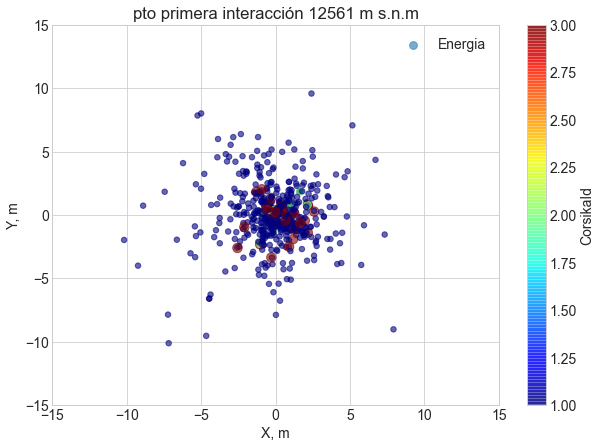

In [222]:
plt.figure(figsize=(8,8))
ds100_.plot(kind="scatter", x="x", y="y", alpha=0.6,
    s=ds100_["CorsikaId"]*30, label="Energia", figsize=(10,7),
    c="CorsikaId", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

#plt.plot(ds100_["x"], ds100_["y"], '.')

plt.xlabel("X, m")
plt.ylabel("Y, m")
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.title("pto primera interacción 12561 m s.n.m")
plt.legend()

In [209]:
r=np.sqrt(ds100_["x"]**2 + ds100_["y"]**2)

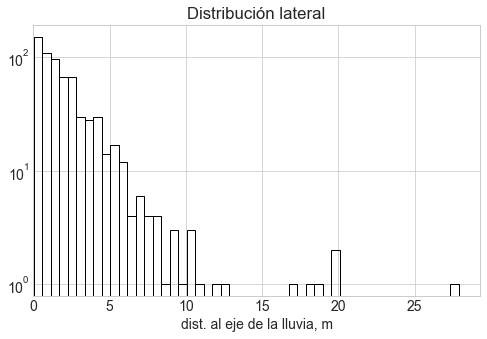

In [241]:
plt.figure(figsize=(8,5))
plt.hist(r, bins=50, fill=False);
plt.title("Distribución lateral")
plt.xlabel(r"dist. al eje de la lluvia, m")
plt.xlim(0, None)
#plt.ylim(None, 10000)
pyplot.yscale('log')
plt.show()

Text(0.5, 0, 'tipo de partícula')

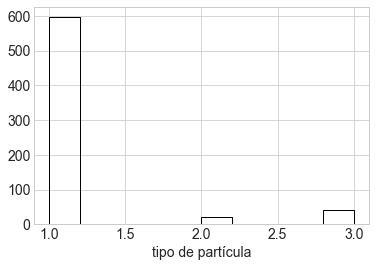

In [246]:
ds100_["CorsikaId"].hist( fill=False)
plt.xlabel("tipo de partícula")
#pyplot.yscale('log')

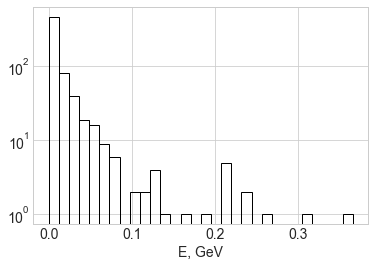

In [200]:
plt.hist(E100, bins=30, fill=False)
plt.xlabel("E, GeV")
#plt.xlim(0, 90)
pyplot.yscale('log')
plt.show()